In [1]:
import sys
sys.path.insert(0, '../slowdaq')
from load_slowdaq import load_slow
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
slowdir = '/data/pb2/ChileData/slowdaq/22300000/20210304/'

In [3]:
files = sorted(glob(slowdir+'*797*'))
files

['/data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_003859_Run22300797_000.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_003904_Run22300797_001.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_004432_Run22300797_002.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_011437_Run22300797_003.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_012037_Run22300797_004.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_020537_Run22300797_005.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_021136_Run22300797_006.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_025641_Run22300797_007.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_030244_Run22300797_008.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_034749_Run22300797_009.log.gz',
 '/data/pb2/ChileData/slowdaq/

In [4]:
data = load_slow(files = files, slowdir=slowdir, sources=['Lakeshore151'])

Loading /data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_003859_Run22300797_000.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_003904_Run22300797_001.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_004432_Run22300797_002.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_011437_Run22300797_003.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_012037_Run22300797_004.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_020537_Run22300797_005.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_021136_Run22300797_006.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_025641_Run22300797_007.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_030244_Run22300797_008.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210304/slowdaq_20210304_034749_Run22300797_0

In [5]:
ls = data['Lakeshore151']
time = np.array(ls['time']) - ls['time'][0]
key = 'MODEL370_370A4A_T'
#l = len(ls[key][0])
tmp = np.array(ls[key])[:,12]

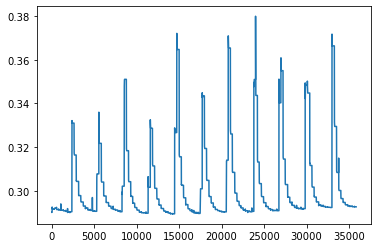

In [6]:
plt.plot(time, tmp)

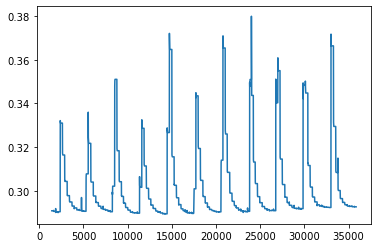

In [7]:
#fig = plt.figure(figsize=(20,10))

# for i in range(l):
#     tmp = np.array(ls[key])[:,i]

#     plt.plot(time, tmp, label=i)
s = 300
e = 7800
plt.plot(time[s:e], tmp[s:e])
#plt.plot(x, tmp_interp)
#plt.plot(x[rise], tmp_interp[rise], 'x')

In [8]:
time = time[s:e]
tmp = tmp[s:e]

x = np.linspace(time[0], time[-1], 150)
tmp_interp = np.interp(x, time, tmp)

In [9]:
rise = np.where(np.diff(tmp_interp)>1e-3)[0]
rise

array([  4,  16,  17,  29,  30,  42,  44,  56,  57,  69,  70,  82,  83,
        96, 109, 110, 123, 136])

In [10]:
a = np.where(np.diff(rise)<10)[0]+1
a

array([ 2,  4,  6,  8, 10, 12, 15])

In [11]:
start_indices = np.delete(rise, a)
start_indices

array([  4,  16,  29,  42,  56,  69,  82,  96, 109, 123, 136])

In [24]:
conv = len(tmp_interp)/(x[-1] - x[0])
end_indices = np.ceil(start_indices + 5*60*conv).astype(dtype=np.int)
end_indices

array([  6,  18,  31,  44,  58,  71,  84,  98, 111, 125, 138])

In [33]:
end_indices = np.array([  5,  18,  31,  45,  58,  71,  84,  97, 111, 124, 137])

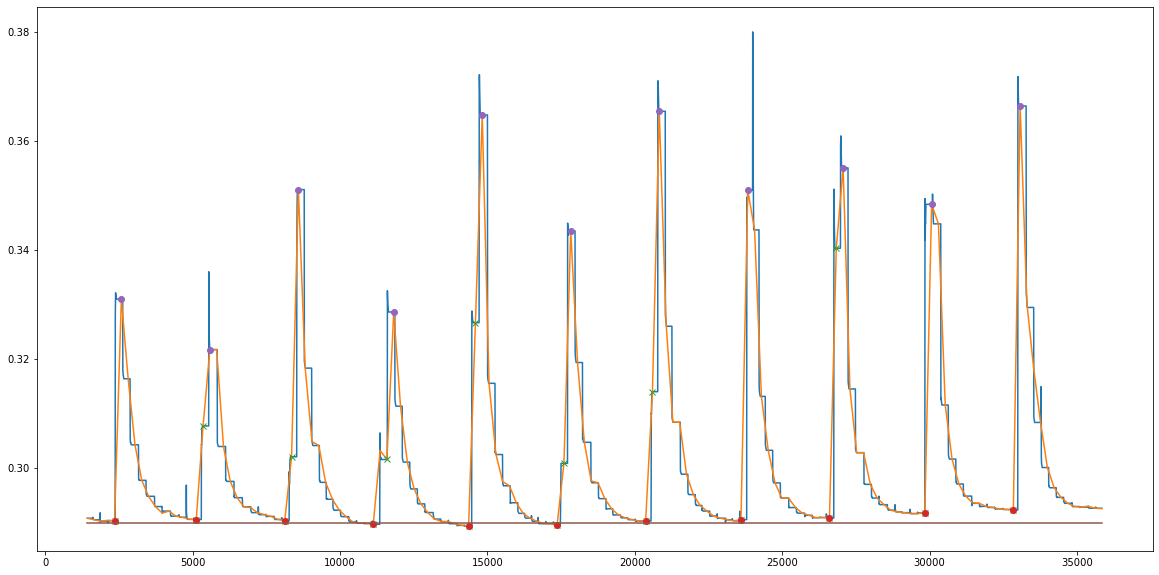

In [34]:
plt.figure(figsize=(20,10))
plt.plot(time, tmp)
plt.plot(x, tmp_interp)
plt.plot(x[rise], tmp_interp[rise], 'x')
plt.plot(x[start_indices], tmp_interp[start_indices], 'o')
plt.plot(x[end_indices], tmp_interp[end_indices], 'o')
plt.plot(x, np.ones_like(x)*0.29)

In [35]:
heating = tmp_interp[end_indices]-tmp_interp[start_indices] 
heating *= 1000
heating

array([40.6244592 , 31.14684895, 60.68962067, 38.90083172, 75.33200443,
       53.89678501, 75.10202465, 60.40554118, 64.18726459, 56.58149571,
       74.07174973])

In [36]:
az_v = np.linspace(3.0, 4.0, 11)
az_v

array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ])

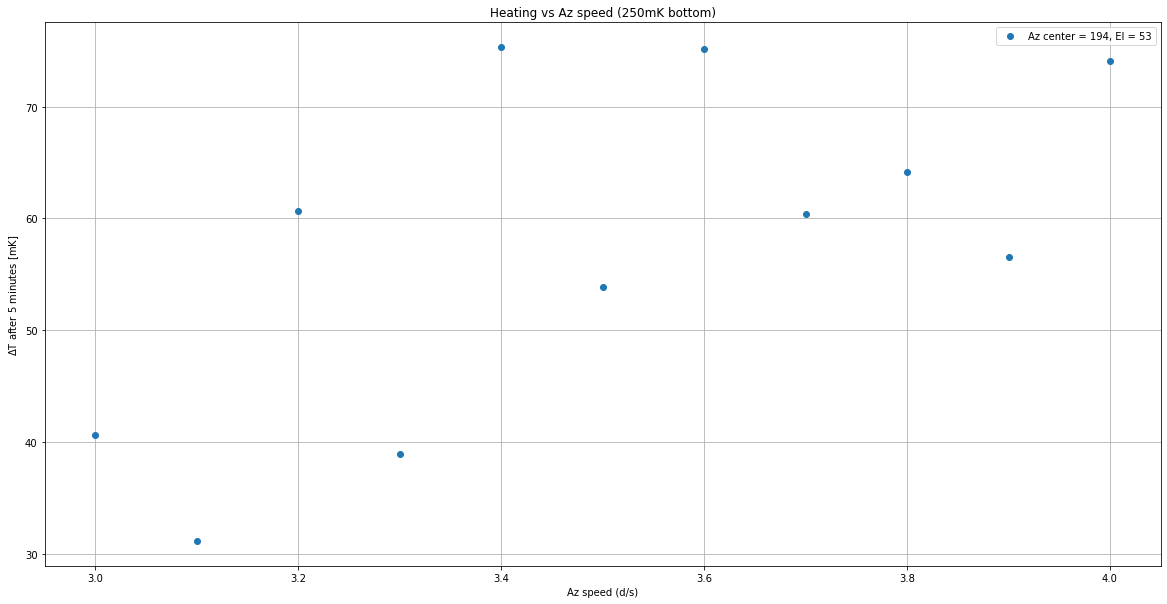

In [37]:
plt.figure(figsize=(20,10))
plt.plot(az_v, heating, 'o', label='Az center = 194, El = 53')
plt.title('Heating vs Az speed (250mK bottom)')
plt.ylabel('$\Delta$T after 5 minutes [mK]')
plt.xlabel('Az speed (d/s)')
plt.legend()
plt.grid()